# High School Big Data Challenge

In [1]:
# Library Imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import r_regression

In [2]:
# Dataframe imports

fossil_renewable_electricity = pd.read_csv('owid_datasets\per-capita-electricity-fossil-nuclear-renewables.csv')
gdp_per_capita = pd.read_csv('owid_datasets\gdp-per-capita-worldbank.csv')
renewable_share = pd.read_csv('owid_datasets\share-electricity-renewables.csv')
pollution_deaths_per_100000 = pd.read_csv('owid_datasets\death-rate-from-air-pollution-per-100000.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'N. Cyprus', 'iso_a3'] = 'CYP'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
pollution_deaths_per_100000.head(10)

,Entity,Code,Year,Death_Rate
0,Afghanistan,AFG,1990,402.175651
1,Afghanistan,AFG,1991,390.085258
2,Afghanistan,AFG,1992,383.201196
3,Afghanistan,AFG,1993,387.704919
4,Afghanistan,AFG,1994,394.022027
5,Afghanistan,AFG,1995,394.255345
6,Afghanistan,AFG,1996,395.642600
7,Afghanistan,AFG,1997,398.577797
8,Afghanistan,AFG,1998,401.162022
9,Afghanistan,AFG,1999,403.811977


In [5]:
# Filtering to 2019 data only

gdp_per_capita.drop(gdp_per_capita[gdp_per_capita.Year != 2019].index, inplace=True)
renewable_share.drop(renewable_share[renewable_share.Year != 2019].index, inplace=True)
fossil_renewable_electricity.drop(fossil_renewable_electricity[fossil_renewable_electricity.Year != 2019].index, inplace=True)
pollution_deaths_per_100000.drop(pollution_deaths_per_100000[pollution_deaths_per_100000.Year != 2019].index, inplace=True)

gdp_per_capita = gdp_per_capita.dropna(subset='Code')
renewable_share = renewable_share.dropna(subset='Code')
pollution_deaths_per_100000.dropna(subset='Code', inplace=True)
fossil_renewable_electricity = fossil_renewable_electricity.dropna()

## Share of Energy Production From Renewables vs Gross Domestic Product

In [6]:
# Merge both datasets
gdp_renewable = pd.merge(gdp_per_capita, renewable_share, on=['Code', 'Year', 'Entity'])

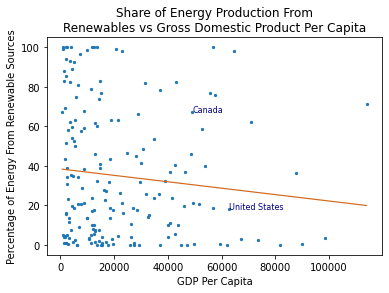

In [7]:
gdp_rnw_x = np.array(gdp_renewable['GDP_PPP'].tolist(), dtype=np.float64)
gdp_rnw_y = np.array(gdp_renewable['PCT'].tolist(), dtype=np.float64)

plt.scatter(gdp_rnw_x, gdp_rnw_y , 5, marker="o")

model = np.poly1d(np.polyfit(gdp_rnw_x, gdp_rnw_y , 1))

line = np.linspace(min(gdp_rnw_x), max(gdp_rnw_x), 10001)

plt.plot(line, model(line), color="chocolate", linewidth=1.2)

# ABOVE IS CURVED LINE, BELOW IS STRAIGHT LINE

# m, b = np.polyfit(gdp_rnw_x, gdp_rnw_y, 1)

# plt.plot(gdp_rnw_x, m*gdp_rnw_x + b, color='orange', label="Best fit")

plt.title("Share of Energy Production From\nRenewables vs Gross Domestic Product Per Capita")
plt.xlabel("GDP Per Capita")
plt.ylabel("Percentage of Energy From Renewable Sources")
plt.annotate("Canada", (gdp_renewable.loc[gdp_renewable['Entity'] == 'Canada']['GDP_PPP'], gdp_renewable.loc[gdp_renewable['Entity'] == 'Canada']['PCT']), fontsize='8', color='navy')
plt.annotate("United States", (gdp_renewable.loc[gdp_renewable['Entity'] == 'United States']['GDP_PPP'], gdp_renewable.loc[gdp_renewable['Entity'] == 'United States']['PCT']), fontsize='8', color='navy')
plt.savefig('output\gdp_rnw.jpg', dpi=600)

## Fossil Fuel Generation vs Energy Production From Renewables

In [8]:
fossil_renewable_electricity.head(10)

,Entity,Code,Year,Fossil fuel electricity per capita (kWh),Nuclear electricity per capita (kWh),Renewable electricity per capita (kWh)
19,Afghanistan,AFG,2019,3.995584,0.000000,23.132327
59,Albania,ALB,2019,0.000000,0.000000,1796.577577
79,Algeria,DZA,2019,1709.887503,0.000000,17.012519
99,American Samoa,ASM,2019,2963.636364,0.000000,0.000000
119,Angola,AGO,2019,74.067766,0.000000,318.006180
139,Antigua and Barbuda,ATG,2019,3367.697595,0.000000,154.639175
159,Argentina,ARG,2019,2007.541591,177.017038,778.363368
180,Armenia,ARM,2019,968.282623,685.936444,798.948614
200,Aruba,ABW,2019,7968.553459,0.000000,1384.075472
220,Australia,AUS,2019,7906.957902,0.000000,2158.467206


In [9]:
fossil_renewable_electricity['Total_Renewable'] = fossil_renewable_electricity['Nuclear electricity per capita (kWh)'] + fossil_renewable_electricity['Renewable electricity per capita (kWh)']

In [10]:
fossil_renewable_electricity.sort_values("Total_Renewable", ascending=False).head(10)

,Entity,Code,Year,Fossil fuel electricity per capita (kWh),Nuclear electricity per capita (kWh),Renewable electricity per capita (kWh),Total_Renewable
1785,Iceland,ISL,2019,8.318584,0.000000,56819.566372,56819.566372
2860,Norway,NOR,2019,438.981223,0.000000,24103.859825,24103.859825
3695,Sweden,SWE,2019,364.388202,6693.523183,9941.029243,16634.552426
710,Canada,CAN,2019,3039.930502,2535.457486,11328.757932,13864.215418
1320,Finland,FIN,2019,2276.876911,4302.643046,5636.371918,9939.014965
466,Bhutan,BTN,2019,0.061162,0.000000,8663.608563,8663.608563
3716,Switzerland,CHE,2019,76.996857,2953.090443,5030.825864,7983.916308
1341,France,FRA,2019,823.446400,6125.315707,1725.740227,7851.055934
2698,New Zealand,NZL,2019,1599.945641,0.000000,7478.411666,7478.411666
1544,Greenland,GRL,2019,1775.555556,0.000000,7229.707602,7229.707602


Coefficients: 
 [-0.11228523]
Mean squared error: 22224151.94
Coefficient of determination: 0.01


Text(4064    7886.077411
Name: Fossil fuel electricity per capita (kWh), dtype: float64, 4064    4761.376324
Name: Total_Renewable, dtype: float64, 'United States')

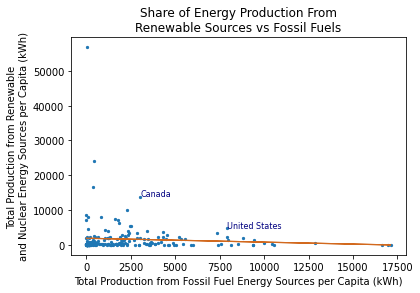

In [11]:
# Creates x and y list from DataFrame
fsl_rnw_x = np.array(fossil_renewable_electricity['Fossil fuel electricity per capita (kWh)'].tolist(), dtype=np.float64).reshape((-1, 1))
fsl_rnw_y = np.array(fossil_renewable_electricity['Total_Renewable'].tolist(), dtype=np.float64)

plt.scatter(fsl_rnw_x, fsl_rnw_y , 5, marker="o")

model = LinearRegression().fit(fsl_rnw_x, fsl_rnw_y)
line = model.predict(fsl_rnw_x)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(fsl_rnw_y, line))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(fsl_rnw_y, line))

# model = np.poly1d(np.polyfit(fsl_rnw_x, fsl_rnw_y , 1))

# line = np.linspace(min(fsl_rnw_x), max(fsl_rnw_x), 10001)

plt.plot(fsl_rnw_x, line, color="chocolate", linewidth=1.2)
# plt.yscale('log')


# ABOVE IS CURVED LINE, BELOW IS STRAIGHT LINE

# m, b = np.polyfit(fsl_rnw_x, fsl_rnw_y, 1)

# plt.plot(fsl_rnw_x, m*fsl_rnw_x + b, color='orange', label="Best fit")

plt.title("Share of Energy Production From\nRenewable Sources vs Fossil Fuels")
plt.xlabel("Total Production from Fossil Fuel Energy Sources per Capita (kWh)")
plt.ylabel("Total Production from Renewable\nand Nuclear Energy Sources per Capita (kWh)")
plt.annotate("Canada", (fossil_renewable_electricity.loc[fossil_renewable_electricity['Entity'] == 'Canada']['Fossil fuel electricity per capita (kWh)'], fossil_renewable_electricity.loc[fossil_renewable_electricity['Entity'] == 'Canada']['Total_Renewable']), fontsize='8', color='navy')
plt.annotate("United States", (fossil_renewable_electricity.loc[fossil_renewable_electricity['Entity'] == 'United States']['Fossil fuel electricity per capita (kWh)'], fossil_renewable_electricity.loc[fossil_renewable_electricity['Entity'] == 'United States']['Total_Renewable']), fontsize='8', color='navy')
#plt.savefig('output\fsl_rnw.jpg', dpi=600)

## Air Pollution Deaths vs Share of Energy From Renewable Sources

In [12]:
dths_rnw = pd.merge(renewable_share, pollution_deaths_per_100000, on=['Code', 'Year', 'Entity'])

Coefficients: 
 [0.07069379]
Mean squared error: 5514.54
Coefficient of determination: 0.00


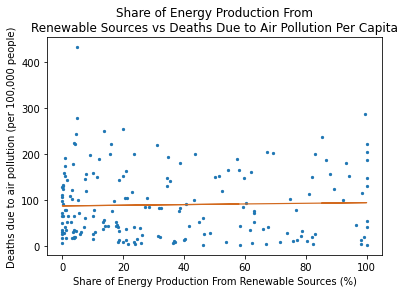

In [13]:
# Creates x and y list from DataFrame
dths_rnw_x = np.array(dths_rnw['PCT'].tolist(), dtype=np.float64).reshape((-1, 1))
dths_rnw_y = np.array(dths_rnw['Death_Rate'].tolist(), dtype=np.float64)

plt.scatter(dths_rnw_x, dths_rnw_y , 5, marker="o")

model = LinearRegression().fit(dths_rnw_x, dths_rnw_y)
line = model.predict(dths_rnw_x)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(dths_rnw_y, line))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(dths_rnw_y, line))

# model = np.poly1d(np.polyfit(dths_rnw_x, dths_rnw_y , 5))

# line = np.linspace(min(dths_rnw_x), max(dths_rnw_x), 10001)

plt.plot(dths_rnw_x, line, color="chocolate", linewidth=1.2)

plt.title("Share of Energy Production From\nRenewable Sources vs Deaths Due to Air Pollution Per Capita")
plt.xlabel("Share of Energy Production From Renewable Sources (%)")
plt.ylabel("Deaths due to air pollution (per 100,000 people)")
plt.savefig('output\dths_rnw.jpg', dpi=600)

In [14]:
world.columns = ['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']
pollution_deaths_per_100000.head(5)

,Entity,Code,Year,Death_Rate
29,Afghanistan,AFG,2019,238.330404
149,Albania,ALB,2019,54.937934
179,Algeria,DZA,2019,78.790841
239,American Samoa,ASM,2019,31.204182
299,Andorra,AND,2019,9.064917


C:\Users\hanzp\AppData\Local\Temp\ipykernel_14312\40024398.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(colourbar.get_yticklabels(), fontsize=32, fontname='Times New Roman')


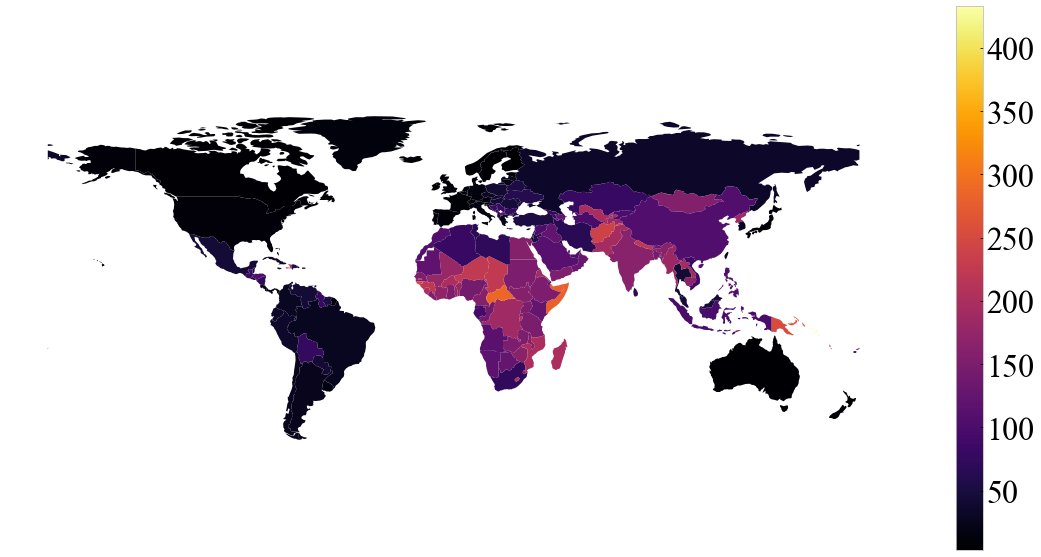

In [15]:
dths_gpd = pd.merge(world, pollution_deaths_per_100000, on=['Code'])

plt.style.use('bmh')
# dths_gpd = dths_gpd.drop(columns=['Entity','Year','pop_est','continent', 'gdp_md_est'])
# dths_gpd = dths_gpd[['name','Code','Death_Rate','geometry']]
# dths_gpd.columns = ['name', 'iso_a3', 'death_rate', 'geometry']

ax = dths_gpd.plot(column='Death_Rate', figsize=(20, 10), legend=True, cmap='inferno', linewidth=12)

colourbar = ax.get_figure().get_axes()[1]
# # colourbar.set_title('Deaths per\n100,000 people', fontsize=24)
colourbar.set_yticklabels(colourbar.get_yticklabels(), fontsize=32, fontname='Times New Roman')

# plt.title('Rate of Death due to Air\nPollution per Capita\n', fontsize=48)
plt.axis('off')
plt.savefig('output/air_pollution_deaths_per_capita.jpg', dpi=600)